In [1]:
from pprint import pprint
from langchain_core.messages import AIMessage, SystemMessage, HumanMessage

In [3]:
messages = [
    SystemMessage(
        content="You are a helpful assistant."
    )
]

messages.extend(
    [HumanMessage(
        content="Hi",
        name="Raj"
    )]
)

messages.extend(
    [AIMessage(
        content="Hi, how can I help you?",
        name="Model"
    )]
)

messages.extend(
    [HumanMessage(
        content="Why the sky is blue?",
        name="Model"
    )]
)

In [4]:
for m in messages:
    m.pretty_print()

================================ System Message ================================

You are a helpful assistant.
================================ Human Message =================================
Name: Raj

Hi
================================== Ai Message ==================================
Name: Model

Hi, how can I help you?
================================ Human Message =================================
Name: Model

Why the sky is blue?


In [6]:
from langchain_openai import ChatOpenAI
import config

In [7]:
llm = ChatOpenAI(
    model="gpt-4o-mini",
    api_key=config.OPENAI_API_KEY
)

In [8]:
result = llm.invoke(input=messages)

In [9]:
type(result)

langchain_core.messages.ai.AIMessage

In [10]:
result.content

"The sky appears blue due to a phenomenon called Rayleigh scattering. When sunlight enters the Earth's atmosphere, it collides with molecules and small particles. Sunlight is composed of different colors, which correspond to different wavelengths. Blue light has a shorter wavelength and is scattered in all directions by these particles much more than the other colors with longer wavelengths (like red or yellow). \n\nAs a result, when we look up at the sky during the day, we see the blue light scattered throughout the atmosphere, making the sky appear blue. During sunrise and sunset, the sun's light passes through a thicker layer of the atmosphere, scattering the shorter blue wavelengths out of our line of sight and allowing the longer red and orange wavelengths to dominate, which is why we often see beautiful red and orange skies during those times."

In [11]:
result.usage_metadata

{'input_tokens': 46,
 'output_tokens': 161,
 'total_tokens': 207,
 'input_token_details': {'audio': 0, 'cache_read': 0},
 'output_token_details': {'audio': 0, 'reasoning': 0}}

In [12]:
result.response_metadata

{'token_usage': {'completion_tokens': 161,
  'prompt_tokens': 46,
  'total_tokens': 207,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_72ed7ab54c',
 'finish_reason': 'stop',
 'logprobs': None}

In [13]:
def multiply(a: int, b:int) -> int:
    """Multiply a and b
    Args:
        a (int): first int
        b (int): second int
    """
    return a*b

In [14]:
llm_with_tool = llm.bind_tools([multiply])

In [15]:
tool_call = llm_with_tool.invoke(
    input=[HumanMessage(
        content="what is 2 multiply 94?",
        name="Raj"
    )]
)

In [16]:
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_R26gkAjJQnzsmLEDpDjwA7WS', 'function': {'arguments': '{"a":2,"b":94}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 73, 'total_tokens': 91, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bd83329f63', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d3e49656-671b-4965-9c67-fa0a1c199e12-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 94}, 'id': 'call_R26gkAjJQnzsmLEDpDjwA7WS', 'type': 'tool_call'}], usage_metadata={'input_tokens': 73, 'output_tokens': 18, 'total_tokens': 91, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [17]:
tool_call.tool_calls

[{'name': 'multiply',
  'args': {'a': 2, 'b': 94},
  'id': 'call_R26gkAjJQnzsmLEDpDjwA7WS',
  'type': 'tool_call'}]

In [18]:
tool_call.response_metadata

{'token_usage': {'completion_tokens': 18,
  'prompt_tokens': 73,
  'total_tokens': 91,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_bd83329f63',
 'finish_reason': 'tool_calls',
 'logprobs': None}

In [19]:
tool_call.content

''

In [21]:
from typing import TypedDict, List
from langchain_core.messages import AnyMessage

In [22]:
class MessagesState(TypedDict):
    messages: List[AnyMessage]

In [23]:
from typing import Annotated, List
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

In [24]:
class MessagesState(TypedDict):
    messages: Annotated[List[AnyMessage], add_messages]

In [25]:
initial_messages = [
    AIMessage(content="Hi! How can I assist you?", name="Model"),
    HumanMessage(content="Why the sky is blue?", name="Raj")
]

In [26]:
new_message = [
    AIMessage(content="Sure, I can help you with that.", name="Model")
]

In [27]:
add_messages(initial_messages, new_message)

[AIMessage(content='Hi! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='32578d6d-af6e-404c-8095-441216741132'),
 HumanMessage(content='Why the sky is blue?', additional_kwargs={}, response_metadata={}, name='Raj', id='d301e3f3-bb77-4dbd-a281-c5dec9cc7cf6'),
 AIMessage(content='Sure, I can help you with that.', additional_kwargs={}, response_metadata={}, name='Model', id='a9fcdae9-1fd2-4105-a3de-1a3e7e85bee1')]

In [28]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [29]:
class MessagesState(MessagesState):
    pass

In [35]:
def tool_calling_llm(state):
    return {"messages": [llm_with_tool.invoke(input=state["messages"])]}

In [36]:
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)

In [37]:
graph = builder.compile()

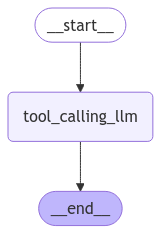

In [38]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [39]:
messages = graph.invoke(input={"messages": HumanMessage(content="Hello")})

In [40]:
messages

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='437b2d51-7070-4c13-91d9-4c4e003dd56c'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 64, 'total_tokens': 75, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bd83329f63', 'finish_reason': 'stop', 'logprobs': None}, id='run-a1f69d1b-1e48-4eb2-a315-a6765026bf5a-0', usage_metadata={'input_tokens': 64, 'output_tokens': 11, 'total_tokens': 75, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [41]:
messages = graph.invoke(input={"messages": HumanMessage(content="multiply 23 and 54")})

In [42]:
messages

{'messages': [HumanMessage(content='multiply 23 and 54', additional_kwargs={}, response_metadata={}, id='5479c9f1-0669-4bae-a84a-6f45a192a060'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8HGtyzQMUnzdMBfukUf6VLrP', 'function': {'arguments': '{"a":23,"b":54}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 69, 'total_tokens': 87, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bd83329f63', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b37d0cdb-5927-4699-8e9c-f4b587186048-0', tool_calls=[{'name': 'multiply', 'args': {'a': 23, 'b': 54}, 'id': 'call_8HGtyzQMUnzdMBfukUf6VLrP', 'type': 'tool_call'}], usage_metadata={'input_tokens': 69, 'output